In [ ]:
# prompt: load mnist dataset

import tensorflow as tf

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
y_test.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)


(10000,)

In [ ]:
# prompt: train neural network with mnist dataset

import tensorflow as tf

# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

# Compile the model
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5)

# Evaluate the model
model.evaluate(x_test,  y_test, verbose=2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8593 - loss: 0.4790
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9532 - loss: 0.1543
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9671 - loss: 0.1108
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9722 - loss: 0.0887
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9770 - loss: 0.0734
313/313 - 1s - 3ms/step - accuracy: 0.9756 - loss: 0.0762


[0.07619022578001022, 0.975600004196167]

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.8836 - loss: 0.3900
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9793 - loss: 0.0649
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9846 - loss: 0.0474
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9879 - loss: 0.0362
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 17ms/step - accuracy: 0.9905 - loss: 0.0292
313/313 - 2s - 7ms/step - accuracy: 0.9882 - loss: 0.0426
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


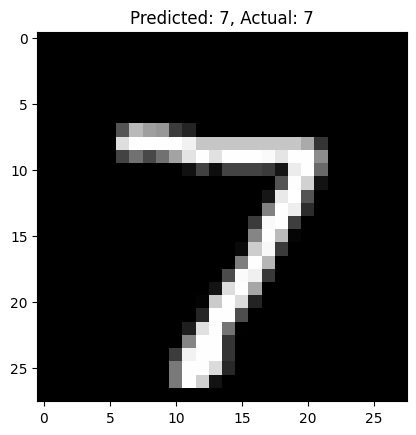

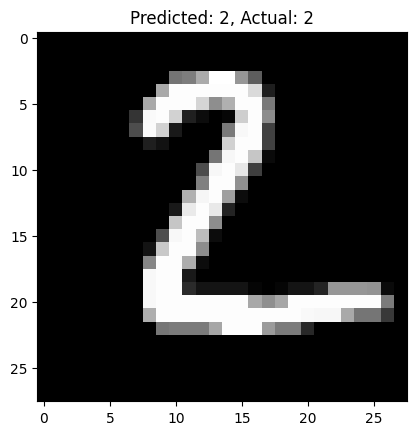

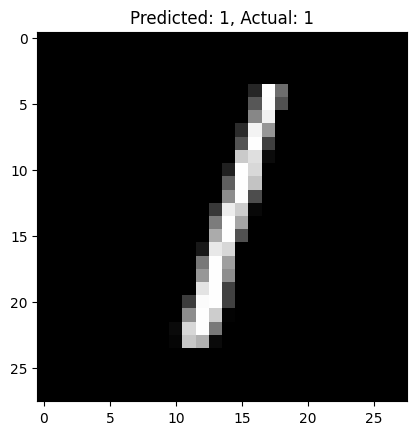

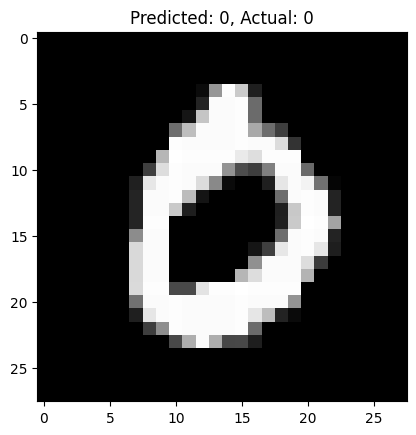

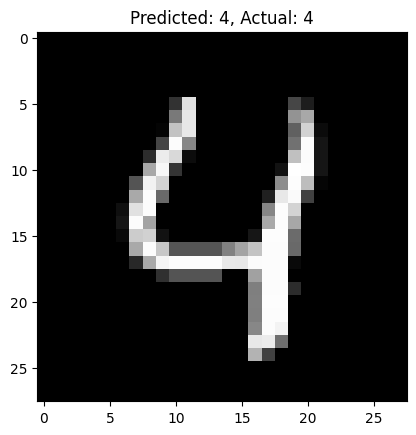

In [ ]:
# prompt: apply leNet-5 then pick 5 sample images and show result with neural network

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the LeNet-5 model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(16, (5, 5), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(120, activation='relu'),
  tf.keras.layers.Dense(84, activation='relu'),
  tf.keras.layers.Dense(10)
])

# Reshape the input data for convolutional layers
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Compile the model
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5)

# Evaluate the model
model.evaluate(x_test,  y_test, verbose=2)

# Predict on 5 sample images
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test[:5])

# Display the images and predictions
for i in range(5):
  plt.figure()
  plt.imshow(x_test[i].reshape(28,28), cmap='gray')
  plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {y_test[i]}")
  plt.show()

In [ ]:
# prompt: show the layers and predict

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 12, 12, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 4, 4, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 133,280 (520.63 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 88,854 (347.09 KB)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - accuracy: 0.8699 - loss: 0.4321
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9766 - loss: 0.0772
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9844 - loss: 0.0499
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9869 - loss: 0.0406
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.9905 - loss: 0.0303


Saving 0_kKxxK1YXSyWMEBtS.png to 0_kKxxK1YXSyWMEBtS.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


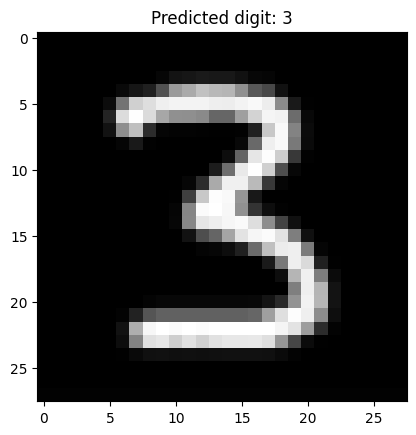

In [ ]:
# prompt: upload image from files and load and normalize the image and predict based on training with leNet-5 and show result

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from PIL import Image
import io

# Load the MNIST dataset (already present in the provided code)
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define and train the LeNet-5 model (already present in the provided code)
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(16, (5, 5), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(120, activation='relu'),
  tf.keras.layers.Dense(84, activation='relu'),
  tf.keras.layers.Dense(10)
])

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5) # You might want to increase epochs for better accuracy


# Upload an image
uploaded = files.upload()

for fn in uploaded.keys():
  image = Image.open(io.BytesIO(uploaded[fn]))
  # Resize and convert to grayscale
  image = image.resize((28, 28)).convert('L')
  # Normalize pixel values
  img_array = np.array(image) / 255.0
  img_array = img_array.reshape(1, 28, 28, 1)

  # Make a prediction
  probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
  prediction = probability_model.predict(img_array)
  predicted_digit = np.argmax(prediction)

  # Show results
  plt.figure()
  plt.imshow(img_array.reshape(28, 28), cmap='gray')
  plt.title(f"Predicted digit: {predicted_digit}")
  plt.show()